This notebook performs the Exploratory Data Analysis on our sample dataset. The dataset collects information related to 50 Journals used in Financial Times Business School Research Ranking. It covers the information about journals, papers and authors.

There are 3 parts of this EDA: it analyzes the information for authors, journals and papers.

In [659]:
# import the database file
import sqlite3
conn = sqlite3.connect("../data/pub_raw.db")

There are 8 tables in this database.
- author: basic information about authors who published on these 50 journals.
- journal: basic information about 50 journals used in Financial Times Business School Research Ranking
- keyword:
- paper: papers published on these 50 journals
- paper_author: relationship between 'paper' and 'author'
- paper_keyword: relationship between 'paper' and 'keyword'
- paper_subject: relationship between 'paper' and 'subject'
- subject: subject used in papers

Import all datasets:

In [660]:
import pandas as pd
# import these tables
author = pd.read_sql_query("select * from author;", conn)
author.head()

,id,full_name,first_name,last_name,middle_name,email,affiliation
0,1,"Benbya, Hind",Hind,Benbya,None,h.benbya@montpellier-bs.com,"Technology and Innovation Management, Montpell..."
1,2,Ning Nan,Ning,Nan,None,ning.nan@sauder.ubc.ca,"Sauder School of Business, University of Briti..."
2,3,"Tanriverdi, Hüseyin",Hüseyin,Tanriverdi,None,Huseyin.Tanriverdi@mccombs.utexas.edu,"McCombs School of Business, The University of ..."
3,4,Youngjin Yoo,Youngjin,Yoo,None,yxy23@case.edu,"Department of Design & Innovation, The Weather..."
4,5,"Pentland, Brian T.",Brian,Pentland,T.,pentlan2@msu.edu,"Eli Broad College of Business, Michigan State ..."


In [661]:
# info for author
# there are 6366 entries in 'author' within 7 attributes
author.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           6366 non-null   int64 
 1   full_name    6366 non-null   object
 2   first_name   6366 non-null   object
 3   last_name    6366 non-null   object
 4   middle_name  2547 non-null   object
 5   email        6366 non-null   object
 6   affiliation  6366 non-null   object
dtypes: int64(1), object(6)
memory usage: 348.3+ KB


In [662]:
# journal
journal = pd.read_sql_query("select * from journal;", conn)
journal.head()

,id,journal_title,volumn,issue,year,issn,doi,total_paper_count,crawl_count,finished
0,1,MIS Quarterly,44,1,2020,None,None,17,17,yes
1,2,MIS Quarterly,43,4,2019,None,None,16,16,yes
2,3,MIS Quarterly,43,3,2019,None,None,15,15,yes
3,4,MIS Quarterly,43,2,2019,None,None,15,15,yes
4,5,MIS Quarterly,43,1,2019,None,None,16,16,yes


In [663]:
# info for journal
# there 439 entries in 'journal' within 10 attributes
journal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 439 non-null    int64 
 1   journal_title      439 non-null    object
 2   volumn             439 non-null    object
 3   issue              439 non-null    object
 4   year               439 non-null    object
 5   issn               0 non-null      object
 6   doi                0 non-null      object
 7   total_paper_count  439 non-null    int64 
 8   crawl_count        439 non-null    int64 
 9   finished           439 non-null    object
dtypes: int64(3), object(7)
memory usage: 34.4+ KB


In [664]:
# keyword
keyword = pd.read_sql_query("select * from keyword;", conn)
keyword.head()

,id,keyword
0,1,chaos
1,2,coevolution
2,3,complexity
3,4,emergence
4,5,scalable dynamics digitalization


In [665]:
# info for keyword
# there are 10146 entries within 2 attributes
keyword.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10146 entries, 0 to 10145
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       10146 non-null  int64 
 1   keyword  10146 non-null  object
dtypes: int64(1), object(1)
memory usage: 158.7+ KB


In [666]:
# paper
paper = pd.read_sql_query("select * from paper;", conn)
paper.head()

,id,title,abstract,publication_date,submission_date,online_date,revision_date,accepted_date,cover_url,full_url,accession_number,document_type,doi,manually_check,journal_id
0,1,complexity and information systems research in...,Complexity is all around us in this increasing...,None,None,None,None,None,None,None,141995164,Article,10.25300/MISQ/2020/13304,None,1
1,2,the dynamics of drift in digitized processes.,This paper uses a simulation to build new theo...,None,None,None,None,None,None,None,141995165,Article,10.25300/MISQ/2020/14458,None,1
2,3,taming complexity in search matching: two-side...,We study digital multisided platforms as compl...,None,None,None,None,None,None,None,141995166,Article,10.25300/MISQ/2020/14424,None,1
3,4,organized complexity of digital business strat...,How should firms configure organizational capa...,None,None,None,None,None,None,None,141995167,Article,10.25300/MISQ/2020/14477,None,1
4,5,digitization and phase transitions in platform...,This paper draws on complex adaptive systems (...,None,None,None,None,None,None,None,141995168,Article,10.25300/MISQ/2020/14520,None,1


In [667]:
# info for paper
# there are 4526 entries within 15 attributes
paper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4526 entries, 0 to 4525
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                4526 non-null   int64 
 1   title             4526 non-null   object
 2   abstract          4526 non-null   object
 3   publication_date  0 non-null      object
 4   submission_date   0 non-null      object
 5   online_date       0 non-null      object
 6   revision_date     0 non-null      object
 7   accepted_date     0 non-null      object
 8   cover_url         0 non-null      object
 9   full_url          0 non-null      object
 10  accession_number  4526 non-null   object
 11  document_type     4526 non-null   object
 12  doi               4526 non-null   object
 13  manually_check    158 non-null    object
 14  journal_id        4526 non-null   int64 
dtypes: int64(2), object(13)
memory usage: 530.5+ KB


In [668]:
# paper_author
paper_author = pd.read_sql_query("select * from paper_author;", conn)
paper_author.head()

,paper_id,author_id
0,1,4
1,1,1
2,1,2
3,1,3
4,2,8


In [669]:
# info for paper_author
# there are 10175 entries within 2 attributes
paper_author.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10175 entries, 0 to 10174
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   paper_id   10175 non-null  int64
 1   author_id  10175 non-null  int64
dtypes: int64(2)
memory usage: 159.1 KB


In [670]:
# paper_keyword
paper_keyword = pd.read_sql_query("select * from paper_keyword;", conn)
paper_keyword.head()

,paper_id,keyword_id
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5


In [671]:
# info for 'paper_keyword'
# 'paper_keyword' has 18302 entries within 2 attributes
paper_keyword.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18302 entries, 0 to 18301
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   paper_id    18302 non-null  int64
 1   keyword_id  18302 non-null  int64
dtypes: int64(2)
memory usage: 286.1 KB


In [672]:
# paper_subject
paper_subject = pd.read_sql_query("select * from paper_subject;", conn)
paper_subject.head()

,paper_id,subject_id
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5


In [673]:
# info for 'paper_subject'
# 'paper_subject' has 34998 attributes within 2 attributes
paper_subject.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34998 entries, 0 to 34997
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   paper_id    34998 non-null  int64
 1   subject_id  34998 non-null  int64
dtypes: int64(2)
memory usage: 547.0 KB


In [674]:
# subject
subject = pd.read_sql_query("select * from subject;", conn)
subject.head()

,id,subject
0,1,information storage & retrieval systems
1,2,research
2,3,sociotechnical systems
3,4,digital technology
4,5,computational complexity


In [675]:
# info for 'subject'
# 'subject' has 4754 entries within 2 attributes
subject.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       4754 non-null   int64 
 1   subject  4754 non-null   object
dtypes: int64(1), object(1)
memory usage: 74.4+ KB


## PART 1: Analyze **'author'**

In [676]:
# there are 2 datasets related to authors: 'author' and 'paper_author'
print(f"Totally there are {len(author)} authors in our dataset")

Totally there are 6366 authors in our dataset


In [677]:
# these 6366 authors also corresponds to the 'author_id' in 'paper_author'
paper_author['author_id'].value_counts()

4241    118
2241     46
656      39
51       39
1611     36
       ... 
4037      1
6086      1
1996      1
4045      1
2049      1
Name: author_id, Length: 6366, dtype: int64

In [678]:
# create a new list to record the unique author
unique_author = author['full_name'].value_counts().index.tolist()
print(f"Totally there are {len(unique_author)} unique authors in our dataset")

Totally there are 4844 unique authors in our dataset


In [679]:
# there are some duplicated entries for the same author
# find the wrong observations through 'manually_check' in 'paper'
# 'manually_check' indicates the wrong recording of the authors' information
paper['manually_check'].value_counts()

yes    158
Name: manually_check, dtype: int64

In [680]:
# there are 158 papers marked as 'manually_check'
# find the papers
manually_check_paper_id = paper[paper['manually_check']=='yes'].id.tolist()

In [681]:
# find the authors related to these papers
paper_author[paper_author['paper_id'].isin(manually_check_paper_id)]

,paper_id,author_id
637,211,548
638,211,549
639,211,550
640,211,551
641,212,552
...,...,...
10087,4468,2279
10088,4468,2573
10089,4468,6226
10130,4497,6349


In [682]:
# author_id for authors related to manually checked papers
manually_check_author_id = list(set(paper_author[paper_author['paper_id'].isin(manually_check_paper_id)].author_id.tolist()))

In [683]:
print(f"there are {len(manually_check_author_id)} authors related to the papers needed manually checked")

there are 477 authors related to the papers needed manually checked


In [684]:
# remove these authors from the original dataset 'author'
author_remove = author[~author['id'].isin(manually_check_author_id)]
author_remove

,id,full_name,first_name,last_name,middle_name,email,affiliation
0,1,"Benbya, Hind",Hind,Benbya,None,h.benbya@montpellier-bs.com,"Technology and Innovation Management, Montpell..."
1,2,Ning Nan,Ning,Nan,None,ning.nan@sauder.ubc.ca,"Sauder School of Business, University of Briti..."
2,3,"Tanriverdi, Hüseyin",Hüseyin,Tanriverdi,None,Huseyin.Tanriverdi@mccombs.utexas.edu,"McCombs School of Business, The University of ..."
3,4,Youngjin Yoo,Youngjin,Yoo,None,yxy23@case.edu,"Department of Design & Innovation, The Weather..."
4,5,"Pentland, Brian T.",Brian,Pentland,T.,pentlan2@msu.edu,"Eli Broad College of Business, Michigan State ..."
...,...,...,...,...,...,...,...
6361,6362,"Lockman, Abe",Abe,Lockman,None,nan,"Assistant Professor, Department of Computer Sc..."
6362,6363,"Shalev, Jacob",Jacob,Shalev,None,nan,"Graduate School of Business Administration, Ne..."
6363,6364,"Clark, Steven J.",Steven,Clark,J.,nan,"Electronics Engineer, Software Support Center,..."
6364,6365,"Norman, Morton",Morton,Norman,None,nan,"Assistant Professor, Department of Statistics ..."


In [685]:
print(f"after removing authors related to manually checked papers, totally we have {len(author_remove)} authors")

after removing authors related to manually checked papers, totally we have 5889 authors


In [686]:
unique_author_remove = author_remove['full_name'].value_counts().index.tolist()
print(f"after removing authors related to manually checked papers, totally there are {len(unique_author_remove)} unique authors in our dataset")

after removing authors related to manually checked papers, totally there are 4609 unique authors in our dataset


In [687]:
# find authors with affiliation change
author_change = author_remove[(author_remove.duplicated(['first_name', 'last_name'], keep=False)) & (~author_remove.duplicated(['affiliation'], keep=False))]

In [688]:
author_change.head()

,id,full_name,first_name,last_name,middle_name,email,affiliation
1,2,Ning Nan,Ning,Nan,None,ning.nan@sauder.ubc.ca,"Sauder School of Business, University of Briti..."
2,3,"Tanriverdi, Hüseyin",Hüseyin,Tanriverdi,None,Huseyin.Tanriverdi@mccombs.utexas.edu,"McCombs School of Business, The University of ..."
3,4,Youngjin Yoo,Youngjin,Yoo,None,yxy23@case.edu,"Department of Design & Innovation, The Weather..."
12,13,YoungKi Park,YoungKi,Park,None,ykpark@gwu.edu,"Information Systems and Technology Management,..."
13,14,"Mithas, Sunil",Sunil,Mithas,None,smithas@usf.edu,"Muma College of Business, University of South ..."


In [689]:
# using 'Ning Nan' as an example
# Ning Nan changes the affiliation
author_remove[(author_remove['first_name']=='Ning') & (author_remove['last_name']=='Nan')]

,id,full_name,first_name,last_name,middle_name,email,affiliation
1,2,Ning Nan,Ning,Nan,None,ning.nan@sauder.ubc.ca,"Sauder School of Business, University of Briti..."
1211,1212,"Nan, Ning",Ning,Nan,None,nnan@ou.edu,"Michael F. Price College of Business, Universi..."
4793,4794,"Nan, Ning",Ning,Nan,None,nan,nan


In [690]:
# remove these observations whose affiliation is 'nan
author_change = author_change[~author_change['affiliation'].isin(['nan'])]

In [691]:
# 'full_name' is not formatted
# so we create a 'modified_name' to combine the first name and last name
modified_name = author_change['first_name'].str.lower() + " " + author_change['last_name'].str.lower()

In [692]:
# concat the 'modified_name' to the original dataframe
author_change = pd.concat([author_change, pd.DataFrame(modified_name, columns=['modified_name'])], axis=1)
author_change.head()

,id,full_name,first_name,last_name,middle_name,email,affiliation,modified_name
1,2,Ning Nan,Ning,Nan,None,ning.nan@sauder.ubc.ca,"Sauder School of Business, University of Briti...",ning nan
2,3,"Tanriverdi, Hüseyin",Hüseyin,Tanriverdi,None,Huseyin.Tanriverdi@mccombs.utexas.edu,"McCombs School of Business, The University of ...",hüseyin tanriverdi
3,4,Youngjin Yoo,Youngjin,Yoo,None,yxy23@case.edu,"Department of Design & Innovation, The Weather...",youngjin yoo
12,13,YoungKi Park,YoungKi,Park,None,ykpark@gwu.edu,"Information Systems and Technology Management,...",youngki park
13,14,"Mithas, Sunil",Sunil,Mithas,None,smithas@usf.edu,"Muma College of Business, University of South ...",sunil mithas


In [693]:
# name for all authors with different affiliation
author_change_name = author_change['modified_name'].value_counts().index.tolist()
author_change_name

['arvind malhotra',
 'izak benbasat',
 'detmar straub',
 'm. markus',
 'dorothy leidner',
 'carol saunders',
 'wonseok oh',
 'kalle lyytinen',
 'joseph valacich',
 'john king',
 'albert segars',
 'geoff walsham',
 'bruce weber',
 'jesse bockstedt',
 'sundeep sahay',
 'viswanath venkatesh',
 'anjana susarla',
 'bin gu',
 'kwok-kee wei',
 'christopher higgins',
 'byungtae lee',
 'zhengrui jiang',
 'james wetherbe',
 'allen lee',
 'george marakas',
 'richard watson',
 'rajiv kohli',
 'charles steinfield',
 'sulin ba',
 'jane webster',
 'shuk ho',
 'maryam alavi',
 'v. sambamurthy',
 'dengpan liu',
 'alan hevner',
 'carol brown',
 'elena karahanna',
 'chris kemerer',
 'omar el sawy',
 'youngjin yoo',
 'cynthia beath',
 'laku chidambaram',
 'sid huff',
 'h. rao',
 'deborah compeau',
 'sandra slaughter',
 'jae-nam lee',
 'kar tam',
 'zhenhui jiang',
 'jie goh',
 'monica garfield',
 'andrew burton-jones',
 'palash bera',
 'gregory northcraft',
 'varun grover',
 'gerardine desanctis',
 'deepa 

In [694]:
# but this result is not accurate
# because the 'affiliation' is not clean
# using 'arvind malhotra' as an example
# he doesn't change the affiliation, but the format of affiliation changes. This leads to the wrong result
author_remove[(author_remove['first_name']=='Arvind') & (author_remove['last_name']=='Malhotra')]

,id,full_name,first_name,last_name,middle_name,email,affiliation
885,886,"Malhotra, Arvind",Arvind,Malhotra,None,malhotra@unc.edu,"Kenan-Flagler Business School, University of N..."
1640,1641,"Malhotra, Arvind",Arvind,Malhotra,None,Arvind_Malhotra@kenan-flag ler.unc.edu,Kenan-Flagler Business School University of No...
1760,1761,"Malhotra, Arvind",Arvind,Malhotra,None,malhotra@bschool.unc.edu,"Kenan-Flagler Business School, University of N..."
1833,1834,"Malhotra, Arvind",Arvind,Malhotra,None,malotra@icarus.bschool.unc.edu,"Kenan-Flagler Business School, CB# 3490 Univer..."
3672,3673,"Malhotra, Arvind",Arvind,Malhotra,None,arvindmalhotra@kenan-flagler.unc.edu,"Kenan-Flagler School of Business, University o..."
3822,3823,"Malhotra, Arvind",Arvind,Malhotra,None,arvind_malhotra@kenan-flagler.unc.edu,"Kenan-Flagler Business School, University of N..."
3887,3888,"Malhotra, Arvind",Arvind,Malhotra,None,arvind_malhotra@kenan-fagler.unc.edu,"Innovation and Entrepreneurship, Kenan-Flagler..."
5514,5515,"Malhotra, Arvind",Arvind,Malhotra,None,nan,Assistant Professor of Information Technology ...


## PART 2. Analyze **'journal'**

In [695]:
# there are 2 datasets related to the journal: journal, paper
journal_quantity = journal['journal_title'].value_counts().index.tolist()

In [696]:
print(f"there are {len(journal_quantity)} journals covered from our dataset")

there are 3 journals covered from our dataset


In [697]:
# count how many issues for each journal in our database
journal_issue_number = []
for i in range(len(journal_quantity)):
    journal_issue_number.append([journal_quantity[i] ,journal[journal['journal_title']==journal_quantity[i]].shape[0], journal[journal['journal_title']==journal_quantity[i]].id.index.tolist()])

In [698]:
# change the column name
journal_issue_number = pd.DataFrame(journal_issue_number, columns=['journal', '# of issues', 'id'])
journal_issue_number

,journal,# of issues,id
0,MIS Quarterly,174,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,Journal of Management Information Systems,145,"[294, 295, 296, 297, 298, 299, 300, 301, 302, ..."
2,Information Systems Research,120,"[174, 175, 176, 177, 178, 179, 180, 181, 182, ..."


In [699]:
# how many papers relate to each journal
paper_count_in_journal = []
for i in range(journal_issue_number.shape[0]):
    count = paper[paper['journal_id'].isin(journal_issue_number['id'][i])].shape[0]
    paper_count_in_journal.append([journal_issue_number['journal'][i], count])

In [700]:
# change the column names
paper_count_in_journal = pd.DataFrame(paper_count_in_journal, columns = ['journal', '# of papers'])
paper_count_in_journal

,journal,# of papers
0,MIS Quarterly,1961
1,Journal of Management Information Systems,1468
2,Information Systems Research,1084


In [701]:
# on average, there are 1504 papers in each journal
paper_count_in_journal['# of papers'].describe()

count       3.000000
mean     1504.333333
std       439.627494
min      1084.000000
25%      1276.000000
50%      1468.000000
75%      1714.500000
max      1961.000000
Name: # of papers, dtype: float64

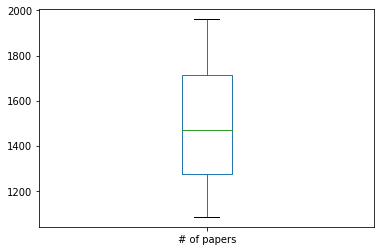

In [702]:
# box plot for '# of papers' in each journal
paper_count_in_journal['# of papers'].plot.box()

In [703]:
# count authors' publications in ? journals
paper_author_journal_id, paper_author_journal_title = [], []
for i in range(len(paper_author)):
    paper_lookfor = paper_author['paper_id'][i]
    # find the journal id
    journal_id_lookfor = int(paper[paper['id'] == paper_lookfor].journal_id)
    # find the journal title
    journal_title_lookfor = journal[journal['id'] == journal_id_lookfor].journal_title.values[0]
    paper_author_journal_id.append(journal_id_lookfor)
    paper_author_journal_title.append(journal_title_lookfor)

In [704]:
paper_author_journal_id = pd.DataFrame(paper_author_journal_id, columns = ['journal_id'])
paper_author_journal_title = pd.DataFrame(paper_author_journal_title, columns = ['journal_title'])

In [705]:
# add the journal_id to count
paper_author_journal = pd.concat([paper_author, paper_author_journal_id, paper_author_journal_title], axis=1)
paper_author_journal.head()

,paper_id,author_id,journal_id,journal_title
0,1,4,1,MIS Quarterly
1,1,1,1,MIS Quarterly
2,1,2,1,MIS Quarterly
3,1,3,1,MIS Quarterly
4,2,8,1,MIS Quarterly


In [706]:
author_journal_count = paper_author_journal[['author_id', 'journal_title']].groupby(['author_id']).agg(['count']).reset_index()
author_journal_count.columns = ['author_id', 'journal_count']

In [707]:
# count how many journals are published by the same author
# for example, author A (id=1) has 1 publication on Journal of Management Information Systems, and 1 publication on 'MIS Quarterly'
# author B (id=2) has 2 publications on MIS Quarterly
paper_author_journal_count = paper_author_journal.groupby(['author_id', 'journal_title']).size().reset_index(name='counts')
paper_author_journal_count

,author_id,journal_title,counts
0,1,Journal of Management Information Systems,1
1,1,MIS Quarterly,1
2,2,MIS Quarterly,2
3,3,MIS Quarterly,3
4,4,MIS Quarterly,1
...,...,...,...
7201,6362,Journal of Management Information Systems,1
7202,6363,Journal of Management Information Systems,1
7203,6364,Journal of Management Information Systems,1
7204,6365,Journal of Management Information Systems,1


In [708]:
# stat info for 'counts': it measures how many papers authors published on a journal
# max=117: this author publishes 117 papers in one journal
# on average each author has 1.41 publications per journal
paper_author_journal_count['counts'].describe()

count    7206.000000
mean        1.412018
std         2.052933
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       117.000000
Name: counts, dtype: float64

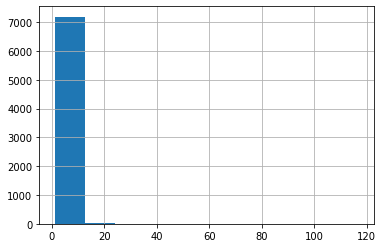

In [709]:
# hist
paper_author_journal_count['counts'].hist()

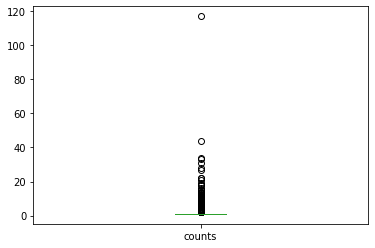

In [710]:
# box plot
paper_author_journal_count['counts'].plot.box()

In [711]:
# author (id=4241) publishes 117 papers on Journal of Management Information Systems
paper_author_journal_count[paper_author_journal_count['counts']==117]

,author_id,journal_title,counts
5047,4241,Journal of Management Information Systems,117


In [712]:
# author id = 4241: Vladimir Zwass
# Vladimir Zwass: Editor-In-Chief of Journal of Management Information Systems
author[author['id']==4241]

,id,full_name,first_name,last_name,middle_name,email,affiliation
4240,4241,"Zwass, Vladimir",Vladimir,Zwass,None,nan,"Fairleigh Dickinson University, Teaneck, New J..."


In [713]:
# confirm our conclusion: there are 118 papers related to Vladimir Zwass
paper_author[paper_author['author_id']==4241]

,paper_id,author_id
6346,2958,4241
6543,3051,4241
6575,3062,4241
6614,3074,4241
6657,3086,4241
...,...,...
10117,4488,4241
10127,4495,4241
10137,4502,4241
10157,4514,4241


In [714]:
# authors have more than 10 publications in one journal
paper_author_journal_count[paper_author_journal_count['counts']>10]

,author_id,journal_title,counts
62,48,MIS Quarterly,11
68,51,MIS Quarterly,28
80,58,MIS Quarterly,22
135,95,MIS Quarterly,11
218,157,Information Systems Research,12
586,433,MIS Quarterly,11
868,656,Information Systems Research,27
869,656,MIS Quarterly,12
1320,1015,MIS Quarterly,18
1388,1071,Information Systems Research,15


In [715]:
print(f"there are {len(paper_author_journal_count[paper_author_journal_count['counts']>10])} authors have more than 10 publications in one journal")

there are 30 authors have more than 10 publications in one journal


In [716]:
# authors have more than 20 publications in one journal
paper_author_journal_count[paper_author_journal_count['counts']>20]

,author_id,journal_title,counts
68,51,MIS Quarterly,28
80,58,MIS Quarterly,22
868,656,Information Systems Research,27
2014,1611,MIS Quarterly,33
2768,2241,Journal of Management Information Systems,44
2787,2250,Journal of Management Information Systems,31
3003,2400,Journal of Management Information Systems,34
3298,2630,MIS Quarterly,21
5047,4241,Journal of Management Information Systems,117
5294,4455,Journal of Management Information Systems,22


In [717]:
print(f"there are {len(paper_author_journal_count[paper_author_journal_count['counts']>20])} authors have more than 20 publications in one journal")

there are 10 authors have more than 20 publications in one journal


In [718]:
# count the journal only in this cell
journal_per_author_count = []
for i in range(len(author)):
    journal_per_author = len(list(set(paper_author_journal[paper_author_journal['author_id'] == author['id'][i]].journal_title.values.tolist())))
    journal_per_author_count.append([author['id'][i], journal_per_author])
journal_per_author_count = pd.DataFrame(journal_per_author_count, columns = ['author_id', '# of journals'])
journal_per_author_count.head()

,author_id,# of journals
0,1,2
1,2,1
2,3,1
3,4,1
4,5,1


In [719]:
# stat info for '# of journals'
# mean: 1.13
# on average, each author publishes on 1.13 journals among 3 selected journals in this dataset
journal_per_author_count['# of journals'].describe()

count    6366.000000
mean        1.131951
std         0.375017
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: # of journals, dtype: float64

In [720]:
# max = 3
# these authors have publications on all 3 selected journals
journal_per_author_count[journal_per_author_count['# of journals'] == 3]

,author_id,# of journals
37,38,3
47,48,3
50,51,3
57,58,3
62,63,3
...,...,...
2528,2529,3
2541,2542,3
2562,2563,3
2563,2564,3


In [721]:
# author_id = 38
# using an example here, author C (id=38) published on all 3 selected journals
paper_author_journal[paper_author_journal['author_id'] == 38]

,paper_id,author_id,journal_id,journal_title
38,12,38,1,MIS Quarterly
636,210,38,14,MIS Quarterly
5169,2462,38,206,Information Systems Research
6671,3091,38,298,Journal of Management Information Systems


## PART 3: Analyze **'paper'**

In [722]:
# there are 4 datasets related to the paper: paper, paper_author, paper_keyword, paper_subject
print(f"totally there are {len(paper)} papers covered in this dataset")

totally there are 4526 papers covered in this dataset


In [723]:
# if we exclude the manually checked paper
paper_exclude = paper.loc[~paper['manually_check'].isin(['yes'])]
print(f"totally there are {len(paper_exclude)} papers covered in this dataset")

totally there are 4368 papers covered in this dataset


In [724]:
print(f"there are {len(paper) - len(paper_exclude)} papers are marked as manually checked")

there are 158 papers are marked as manually checked


In [725]:
paper['journal_id'].value_counts()

204    26
211    25
176    24
178    23
129    22
       ..
289     3
278     3
290     3
288     3
287     3
Name: journal_id, Length: 439, dtype: int64

In [726]:
paper.head()

,id,title,abstract,publication_date,submission_date,online_date,revision_date,accepted_date,cover_url,full_url,accession_number,document_type,doi,manually_check,journal_id
0,1,complexity and information systems research in...,Complexity is all around us in this increasing...,None,None,None,None,None,None,None,141995164,Article,10.25300/MISQ/2020/13304,None,1
1,2,the dynamics of drift in digitized processes.,This paper uses a simulation to build new theo...,None,None,None,None,None,None,None,141995165,Article,10.25300/MISQ/2020/14458,None,1
2,3,taming complexity in search matching: two-side...,We study digital multisided platforms as compl...,None,None,None,None,None,None,None,141995166,Article,10.25300/MISQ/2020/14424,None,1
3,4,organized complexity of digital business strat...,How should firms configure organizational capa...,None,None,None,None,None,None,None,141995167,Article,10.25300/MISQ/2020/14477,None,1
4,5,digitization and phase transitions in platform...,This paper draws on complex adaptive systems (...,None,None,None,None,None,None,None,141995168,Article,10.25300/MISQ/2020/14520,None,1


In [727]:
# analyze the length of title/abstract
title_length, abstract_length = [], []
for i in range(len(paper)):
    title_length.append(len(paper['title'][i]))
    abstract_length.append(len(paper['abstract'][i]))

In [728]:
title_length = pd.DataFrame(title_length, columns = ['title_length'])
abstract_length = pd.DataFrame(abstract_length, columns = ['abstract_length'])

In [729]:
# create a new dataframe within the length of title/abstract
paper_length = pd.concat([paper, title_length, abstract_length], axis=1)
paper_length.head()

,id,title,abstract,publication_date,submission_date,online_date,revision_date,accepted_date,cover_url,full_url,accession_number,document_type,doi,manually_check,journal_id,title_length,abstract_length
0,1,complexity and information systems research in...,Complexity is all around us in this increasing...,None,None,None,None,None,None,None,141995164,Article,10.25300/MISQ/2020/13304,None,1,74,1506
1,2,the dynamics of drift in digitized processes.,This paper uses a simulation to build new theo...,None,None,None,None,None,None,None,141995165,Article,10.25300/MISQ/2020/14458,None,1,45,1030
2,3,taming complexity in search matching: two-side...,We study digital multisided platforms as compl...,None,None,None,None,None,None,None,141995166,Article,10.25300/MISQ/2020/14424,None,1,89,1102
3,4,organized complexity of digital business strat...,How should firms configure organizational capa...,None,None,None,None,None,None,None,141995167,Article,10.25300/MISQ/2020/14477,None,1,81,2004
4,5,digitization and phase transitions in platform...,This paper draws on complex adaptive systems (...,None,None,None,None,None,None,None,141995168,Article,10.25300/MISQ/2020/14520,None,1,112,1235


In [730]:
# title length for papers
# mean: 77
# min: 4
# max: 238
paper_length['title_length'].describe()

count    4526.000000
mean       76.997570
std        32.822715
min         4.000000
25%        56.000000
50%        79.000000
75%        99.000000
max       238.000000
Name: title_length, dtype: float64

In [731]:
# min title length = 4
# this should be a wrong entry
paper_length[paper_length['title_length']==4]

,id,title,abstract,publication_date,submission_date,online_date,revision_date,accepted_date,cover_url,full_url,accession_number,document_type,doi,manually_check,journal_id,title_length,abstract_length
439,440,use.,The article presents the authors' opinion that...,None,None,None,None,None,None,None,83465872,Opinion,nan,None,30,4,376


In [732]:
# title length < 50
paper_length[paper_length['title_length']<20]

,id,title,abstract,publication_date,submission_date,online_date,revision_date,accepted_date,cover_url,full_url,accession_number,document_type,doi,manually_check,journal_id,title_length,abstract_length
17,18,editor’s comments.,The article discuss the design of the Reviewer...,None,None,None,None,None,None,None,141906422,Article,nan,None,2,18,478
206,207,editor’s comments.,The article presents several perspectives on s...,None,None,None,None,None,None,None,121204218,Article,nan,None,13,18,315
216,217,editor’s comments.,An introduction discusses the forty year histo...,None,None,None,None,None,None,None,119473684,Article,nan,None,14,18,53
233,234,editor’s comments.,The article offers advice on the academic peer...,None,None,None,None,None,None,None,117951006,Article,nan,None,15,18,346
249,250,editor’s comments.,The author shares his thoughts on changes in t...,None,None,None,None,None,None,None,115296634,Editorial,nan,None,16,18,471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3640,3641,erratum.,"A correction to the article ""The Role of Infor...",None,None,None,None,None,None,None,28857218,Correction notice,nan,None,345,8,207
4478,4479,erratum.,This article presents a correction to the arti...,None,None,None,None,None,None,None,5745640,Correction notice,10.1080/07421222.1986.11517749,None,432,8,124
4494,4495,about this issue.,nan,None,None,None,None,None,None,None,27245540,Article,10.1080/07421222.1985.11517719,None,436,17,3
4501,4502,about this issue.,nan,None,None,None,None,None,None,None,27245565,Article,10.1080/07421222.1985.11517711,None,437,17,3


In [733]:
# some observations should be removed with the title 'editor’s comments.'
paper_length[paper_length['title'] == 'editor’s comments.']

,id,title,abstract,publication_date,submission_date,online_date,revision_date,accepted_date,cover_url,full_url,accession_number,document_type,doi,manually_check,journal_id,title_length,abstract_length
17,18,editor’s comments.,The article discuss the design of the Reviewer...,None,None,None,None,None,None,None,141906422,Article,nan,None,2,18,478
206,207,editor’s comments.,The article presents several perspectives on s...,None,None,None,None,None,None,None,121204218,Article,nan,None,13,18,315
216,217,editor’s comments.,An introduction discusses the forty year histo...,None,None,None,None,None,None,None,119473684,Article,nan,None,14,18,53
233,234,editor’s comments.,The article offers advice on the academic peer...,None,None,None,None,None,None,None,117951006,Article,nan,None,15,18,346
249,250,editor’s comments.,The author shares his thoughts on changes in t...,None,None,None,None,None,None,None,115296634,Editorial,nan,None,16,18,471
261,262,editor’s comments.,"In this article, the author focuses on joining...",None,None,None,None,None,None,None,112750554,Article,nan,None,17,18,407


In [734]:
# # some observations should be removed with the title 'about this issue.'
paper_length[paper_length['title'] == 'about this issue.']

,id,title,abstract,publication_date,submission_date,online_date,revision_date,accepted_date,cover_url,full_url,accession_number,document_type,doi,manually_check,journal_id,title_length,abstract_length
4494,4495,about this issue.,nan,None,None,None,None,None,None,None,27245540,Article,10.1080/07421222.1985.11517719,None,436,17,3
4501,4502,about this issue.,nan,None,None,None,None,None,None,None,27245565,Article,10.1080/07421222.1985.11517711,None,437,17,3
4513,4514,about this issue.,nan,None,None,None,None,None,None,None,27251369,Article,10.1080/07421222.1984.11517700,None,439,17,3


In [735]:
# check the duplicated titles
a = paper_length[paper_length['title_length']<20]
a['title'].value_counts()

executive overview.    176
editorial notes.        45
editor's comments.      36
editorial preview.      24
about our authors.      15
editor's comment.       12
from our readers.        9
correction.              6
editor’s comments.       6
erratum.                 5
editorial note.          4
errata notes.            4
index to                 4
about this issue.        3
editorial board.         3
to the editor.           2
corrigendum.             1
what can the             1
prelude.                 1
stabilizing an mis.      1
use.                     1
errata note.             1
generalizability of      1
editor's notes.          1
ceos and their pcs.      1
senior editor note.      1
reach and grasp.         1
the alliance.            1
editors' preface.        1
colonial systems.        1
Name: title, dtype: int64

In [736]:
# title should be removed
title_remove = a['title'].value_counts().index.tolist()
title_remove

['executive overview.',
 'editorial notes.',
 "editor's comments.",
 'editorial preview.',
 'about our authors.',
 "editor's comment.",
 'from our readers.',
 'correction.',
 'editor’s comments.',
 'erratum.',
 'editorial note.',
 'errata notes.',
 'index to',
 'about this issue.',
 'editorial board.',
 'to the editor.',
 'corrigendum.',
 'what can the',
 'prelude.',
 'stabilizing an mis.',
 'use.',
 'errata note.',
 'generalizability of',
 "editor's notes.",
 'ceos and their pcs.',
 'senior editor note.',
 'reach and grasp.',
 'the alliance.',
 "editors' preface.",
 'colonial systems.']

In [737]:
# some titles should be acceptable
# for 'corrigendum.': should be dropped
paper_length[paper_length['title'] == 'corrigendum.']

,id,title,abstract,publication_date,submission_date,online_date,revision_date,accepted_date,cover_url,full_url,accession_number,document_type,doi,manually_check,journal_id,title_length,abstract_length
3130,3131,corrigendum.,"A correction is presented to the article ""A Vi...",None,None,None,None,None,None,None,132664860,Correction Notice,10.1080/07421222.2018.1491254,None,301,12,147


In [738]:
# for 'what can the': should be dropped
paper_length[paper_length['title'] == 'what can the']

,id,title,abstract,publication_date,submission_date,online_date,revision_date,accepted_date,cover_url,full_url,accession_number,document_type,doi,manually_check,journal_id,title_length,abstract_length
1370,1371,what can the,nan,None,None,None,None,None,None,None,19327031,Article,nan,None,119,12,3


In [739]:
# prelude.: should be kept
paper_length[paper_length['title'] == 'prelude.']

,id,title,abstract,publication_date,submission_date,online_date,revision_date,accepted_date,cover_url,full_url,accession_number,document_type,doi,manually_check,journal_id,title_length,abstract_length
712,713,prelude.,This article offers an introduction to this is...,None,None,None,None,None,None,None,25980850,Article,nan,None,51,8,53


In [740]:
title_remove.remove('prelude.')

In [741]:
# stabilizing an mis.: should be kept
paper_length[paper_length['title'] == 'stabilizing an mis.']

,id,title,abstract,publication_date,submission_date,online_date,revision_date,accepted_date,cover_url,full_url,accession_number,document_type,doi,manually_check,journal_id,title_length,abstract_length
1882,1883,stabilizing an mis.,Technical managers of MIS appear to have only ...,None,None,None,None,None,None,None,4679125,Article,10.2307/249046,None,163,19,1422


In [742]:
title_remove.remove('stabilizing an mis.')

In [743]:
# use.: should be kept
paper_length[paper_length['title'] == 'use.']

,id,title,abstract,publication_date,submission_date,online_date,revision_date,accepted_date,cover_url,full_url,accession_number,document_type,doi,manually_check,journal_id,title_length,abstract_length
439,440,use.,The article presents the authors' opinion that...,None,None,None,None,None,None,None,83465872,Opinion,nan,None,30,4,376


In [744]:
title_remove.remove('use.')

In [745]:
# errata note.: should be dropped
paper_length[paper_length['title'] == 'errata note.']

,id,title,abstract,publication_date,submission_date,online_date,revision_date,accepted_date,cover_url,full_url,accession_number,document_type,doi,manually_check,journal_id,title_length,abstract_length
295,296,errata note.,A correction is offered for a figure illustrat...,None,None,None,None,None,None,None,102375762,Correction Notice,nan,None,20,12,260


In [746]:
# 'generalizability of': should be kept
paper_length[paper_length['title'] == 'generalizability of']

,id,title,abstract,publication_date,submission_date,online_date,revision_date,accepted_date,cover_url,full_url,accession_number,document_type,doi,manually_check,journal_id,title_length,abstract_length
2397,2398,generalizability of,"Information systems researchers, like those in...",None,None,None,None,None,None,None,84380598,Opinion,10.1287/isre.1120.0423,None,203,19,1759


In [747]:
title_remove.remove('generalizability of')

In [748]:
# 'ceos and their pcs.'
# this is the editor's views, so I remove it
paper_length[paper_length['title'] == 'ceos and their pcs.']

,id,title,abstract,publication_date,submission_date,online_date,revision_date,accepted_date,cover_url,full_url,accession_number,document_type,doi,manually_check,journal_id,title_length,abstract_length
1717,1718,ceos and their pcs.,This article presents the editor's views on th...,None,None,None,None,None,None,None,28032750,Article,nan,None,140,19,385


In [749]:
# 'reach and grasp.',: should be kept
paper_length[paper_length['title'] == 'reach and grasp.']

,id,title,abstract,publication_date,submission_date,online_date,revision_date,accepted_date,cover_url,full_url,accession_number,document_type,doi,manually_check,journal_id,title_length,abstract_length
816,817,reach and grasp.,The short history of Information Systems sugge...,None,None,None,None,None,None,None,15493925,Article,10.2307/25148654,None,63,16,963


In [750]:
title_remove.remove('reach and grasp.')

In [751]:
# 'the alliance.': should be kept
paper_length[paper_length['title'] == 'the alliance.']

,id,title,abstract,publication_date,submission_date,online_date,revision_date,accepted_date,cover_url,full_url,accession_number,document_type,doi,manually_check,journal_id,title_length,abstract_length
881,882,the alliance.,The article presents an introduction to the Se...,None,None,None,None,None,None,None,18157278,Article,nan,None,72,13,69


In [752]:
title_remove.remove('the alliance.')

In [753]:
# "editors' preface.": should be removed
paper_length[paper_length['title'] == "editors' preface."]

,id,title,abstract,publication_date,submission_date,online_date,revision_date,accepted_date,cover_url,full_url,accession_number,document_type,doi,manually_check,journal_id,title_length,abstract_length
2285,2286,editors' preface.,"A preface to the periodical """,None,None,None,None,None,None,None,103101330,Article,10.1287/isre.2014.0561,None,195,17,29


In [754]:
# 'colonial systems.': should be kept
paper_length[paper_length['title'] == "colonial systems."]

,id,title,abstract,publication_date,submission_date,online_date,revision_date,accepted_date,cover_url,full_url,accession_number,document_type,doi,manually_check,journal_id,title_length,abstract_length
2868,2869,colonial systems.,Colonial systems are presented as an alternati...,None,None,None,None,None,None,None,1939603,Article,10.1287/isre.10.1.38,None,258,17,1215


In [755]:
title_remove.remove('colonial systems.')

In [756]:
# remove the paper whose title is in 'title_remove'
paper_length = paper_length[~paper_length['title'].isin(title_remove)].reset_index()

In [757]:
paper_length.drop(['index'], axis=1, inplace=True)
paper_length.head()

,id,title,abstract,publication_date,submission_date,online_date,revision_date,accepted_date,cover_url,full_url,accession_number,document_type,doi,manually_check,journal_id,title_length,abstract_length
0,1,complexity and information systems research in...,Complexity is all around us in this increasing...,None,None,None,None,None,None,None,141995164,Article,10.25300/MISQ/2020/13304,None,1,74,1506
1,2,the dynamics of drift in digitized processes.,This paper uses a simulation to build new theo...,None,None,None,None,None,None,None,141995165,Article,10.25300/MISQ/2020/14458,None,1,45,1030
2,3,taming complexity in search matching: two-side...,We study digital multisided platforms as compl...,None,None,None,None,None,None,None,141995166,Article,10.25300/MISQ/2020/14424,None,1,89,1102
3,4,organized complexity of digital business strat...,How should firms configure organizational capa...,None,None,None,None,None,None,None,141995167,Article,10.25300/MISQ/2020/14477,None,1,81,2004
4,5,digitization and phase transitions in platform...,This paper draws on complex adaptive systems (...,None,None,None,None,None,None,None,141995168,Article,10.25300/MISQ/2020/14520,None,1,112,1235


In [758]:
# measure the title length again
paper_length['title_length'].describe()

count    4165.000000
mean       82.143818
std        28.951236
min         4.000000
25%        62.000000
50%        82.000000
75%       101.000000
max       238.000000
Name: title_length, dtype: float64

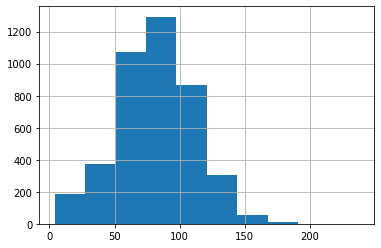

In [759]:
# hist for 'title_length'
paper_length['title_length'].hist()

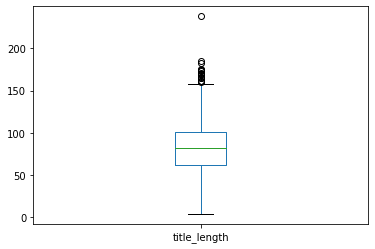

In [760]:
# box plot for title length
paper_length['title_length'].plot.box()

In [761]:
# length of the abstract
paper_length['abstract_length'].describe()

count    4165.000000
mean     1124.406723
std       583.813519
min         3.000000
25%       752.000000
50%      1142.000000
75%      1486.000000
max      3915.000000
Name: abstract_length, dtype: float64

In [762]:
# min abstract length = 3
# it responds to 'nan'
paper_length[paper_length['abstract_length']==3]

,id,title,abstract,publication_date,submission_date,online_date,revision_date,accepted_date,cover_url,full_url,accession_number,document_type,doi,manually_check,journal_id,title_length,abstract_length
77,79,next-generation digital platforms: toward huma...,nan,None,None,None,None,None,None,None,134555820,Letter to the Editor,nan,None,5,59,3
724,743,what does it take for a journal to be global?,nan,None,None,None,None,None,None,None,21940321,Editorial,nan,None,55,45,3
856,883,special issue on redefining the oranizational ...,nan,None,None,None,None,None,None,None,27094673,Article,nan,None,72,101,3
857,884,executive overviews.,nan,None,None,None,None,None,None,None,28351730,Article,nan,None,72,20,3
879,907,research in information systems: what we haven...,nan,None,None,None,None,None,None,None,27156499,Article,nan,None,75,57,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4076,4434,editorial introduction.,nan,None,None,None,None,None,None,None,27201773,Article,10.1080/07421222.1987.11517782,None,427,23,3
4083,4441,special issue: decision support and knowledge...,nan,None,None,None,None,None,None,None,5743681,Article,10.1080/07421222.1987.11517774,None,428,61,3
4090,4448,editorial introduction.,nan,None,None,None,None,None,None,None,27230106,Article,10.1080/07421222.1986.11517766,None,429,23,3
4129,4488,editorial introduction.,nan,None,None,None,None,None,None,None,27245510,Article,10.1080/07421222.1985.11517726,None,435,23,3


In [763]:
# remove these rows
paper_length = paper_length[paper_length['abstract_length']>3]

In [764]:
# check the abstract length again
paper_length['abstract_length'].describe()

count    4040.000000
mean     1159.103713
std       557.909779
min         5.000000
25%       804.000000
50%      1166.500000
75%      1495.250000
max      3915.000000
Name: abstract_length, dtype: float64

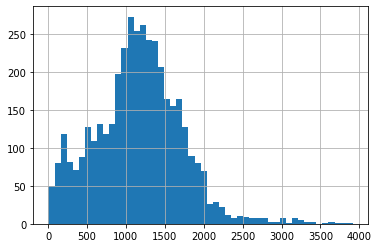

In [765]:
# hist for abstract length
paper_length['abstract_length'].hist(bins=50)

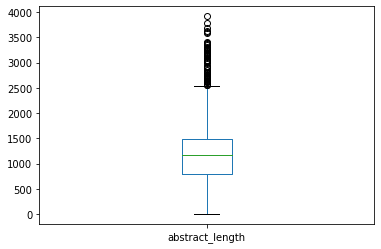

In [766]:
# hist for abstract length
paper_length['abstract_length'].plot.box()

In [767]:
# min abstract length = 5
# it corresponds to length
paper_length[paper_length['abstract_length']==5]

,id,title,abstract,publication_date,submission_date,online_date,revision_date,accepted_date,cover_url,full_url,accession_number,document_type,doi,manually_check,journal_id,title_length,abstract_length
2220,2528,digital natives and ubiquitous information sys...,Most,None,None,None,None,None,None,None,57155473,Article,10.1287/isre.1100.0324,None,211,51,5


In [768]:
# when 'abstract_length'<50, it usually represents a wrong observation
paper_length[paper_length['abstract_length']<50]

,id,title,abstract,publication_date,submission_date,online_date,revision_date,accepted_date,cover_url,full_url,accession_number,document_type,doi,manually_check,journal_id,title_length,abstract_length
448,459,comparing pls to regression and lisrel: a resp...,In the Foreword to an,None,None,None,None,None,None,None,78167557,Article,10.2307/41703476,yes,31,86,22
463,475,assessing common method bias: problems with th...,"Recent work, in journals such as",None,None,None,None,None,None,None,78164866,Article,10.2307/41703491,None,31,63,33
696,714,2006 best paper award.,This article presents the winners of the,None,None,None,None,None,None,None,25980852,Article,nan,None,51,22,41
1004,1032,rigor and relevance: careers on the line.,In this issue of,None,None,None,None,None,None,None,1852780,Article,10.2307/249404,None,86,41,17
1070,1102,measuring information systems service quality:...,A recent,None,None,None,None,None,None,None,9708156178,Article,10.2307/249419,yes,93,97,9
1786,2070,call for papers—special issue of,"Submission deadline: June 30, 2018",None,None,None,None,None,None,None,132289475,Article,10.1287/isre.2017.0762,None,179,32,35
1815,2100,editorial responsibilities and a note on resea...,The author talks about the field of,None,None,None,None,None,None,None,128737488,Editorial,10.1287/isre.2018.0783,None,182,56,36
1842,2129,call for papers-special issue of,"Submission deadline: June 30, 2018",None,None,None,None,None,None,None,126798422,Article,10.1287/isre.2017.0762,None,183,32,35
1923,2217,research spotlights.,The article presents abstracts related to,None,None,None,None,None,None,None,116255696,Article,10.1287/isre.2016.0639,None,189,20,42
2220,2528,digital natives and ubiquitous information sys...,Most,None,None,None,None,None,None,None,57155473,Article,10.1287/isre.1100.0324,None,211,51,5


In [769]:
# remove these observations from the dataset
paper_length = paper_length[paper_length['abstract_length']>50]

In [770]:
# stat info for 'abstract length'
paper_length['abstract_length'].describe()

count    4024.000000
mean     1163.605865
std       554.419906
min        51.000000
25%       812.750000
50%      1168.500000
75%      1498.000000
max      3915.000000
Name: abstract_length, dtype: float64

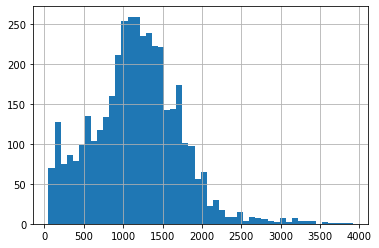

In [771]:
# hist for abstract length
paper_length['abstract_length'].hist(bins=50)

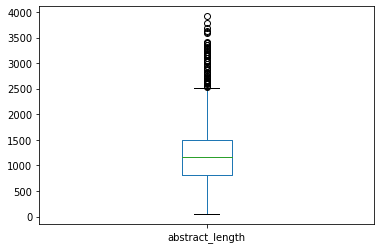

In [772]:
# box plot for 'abstract_length'
paper_length['abstract_length'].plot.box()

In [773]:
# for some observations, the 'abstract_length' is too long (>2500)
paper_length[paper_length['abstract_length']>2500].abstract.tolist()

['The treatment of chronic diseases consumes 86% of U.S. healthcare costs. While healthcare organizations have traditionally focused on treating the complications of chronic diseases, advances in information technology (IT) and analytics can help clinicians and patients manage and slow the progression of chronic diseases to result in higher quality of life for patients and lower healthcare costs. We build on prior research to introduce the notion of temporal displacement of care (TDC), in which IT and analytics create healthcare value by displacing the time at which providers and patients make interventions to improve healthcare outcomes and reduce costs. We propose that healthcare value is created by strategic actions taken at specific points-in-time during the treatment process. Our theoretical development identifies TDC mechanisms through which IT and analytics displace later high cost interventions in favor of earlier preventative procedures. We test our hypotheses using four years

Analyze the length of title/abstract feature for each journal:

In [774]:
# 'journal_quantity': record the journal name
# 'journal_issue_number': record the journal id related to each journal
import numpy as np
for i in range(len(journal_quantity)):
    # journal title
    journal_name = journal_quantity[i]
    # find the id related to this journal
    journal_id_list = journal_issue_number[journal_issue_number['journal']==journal_name].id.tolist()[0]
    # find the papers related to this journal
    a = paper_length[paper_length['journal_id'].isin(journal_id_list)]
    # calculate the mean title length
    title_mean = a['title_length'].mean()
    print("**************************************************************************************")
    print(f"for {journal_name}, the average length of the title is: {np.round(title_mean,2)}")
    # calculate the mean abstract length
    abstract_mean = a['abstract_length'].mean()
    print(f"for {journal_name}, the average length of the abstract is: {np.round(abstract_mean, 2)}")

**************************************************************************************
for MIS Quarterly, the average length of the title is: 82.34
for MIS Quarterly, the average length of the abstract is: 1048.01
**************************************************************************************
for Journal of Management Information Systems, the average length of the title is: 82.35
for Journal of Management Information Systems, the average length of the abstract is: 1107.45
**************************************************************************************
for Information Systems Research, the average length of the title is: 87.03
for Information Systems Research, the average length of the abstract is: 1438.98


Analyze the relationship between 'paper' and 'keyword'

In [775]:
print(f"there are totally {len(keyword)} keywords appeared in the dataset")

there are totally 10146 keywords appeared in the dataset


In [776]:
# which keywords are popular?
paper_keyword['keyword_id'].value_counts()

3133    76
539     73
134     68
151     60
355     58
        ..
6986     1
9037     1
2904     1
857      1
4086     1
Name: keyword_id, Length: 10146, dtype: int64

In [777]:
# keyword 'decision support systems' has been used 76 times
keyword[keyword['id']==3133].keyword.tolist()[0]

'decision support systems'

In [778]:
# keyword 'electronic commerce' has been used 73 times
keyword[keyword['id']==539].keyword.tolist()[0]

'electronic commerce'

In [779]:
keyword_popularity = pd.DataFrame(paper_keyword['keyword_id'].value_counts()).reset_index()
keyword_popularity.columns = ['keyword_id', 'freq']

In [780]:
# 'keyword_popularity' counts the frequency for each keyword
keyword_popularity.head()

,keyword_id,freq
0,3133,76
1,539,73
2,134,68
3,151,60
4,355,58


In [781]:
# stat info for keyword frequency
# on average, each keyword appears in 1.8 papers
keyword_popularity['freq'].describe()

count    10146.000000
mean         1.803864
std          3.106674
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         76.000000
Name: freq, dtype: float64

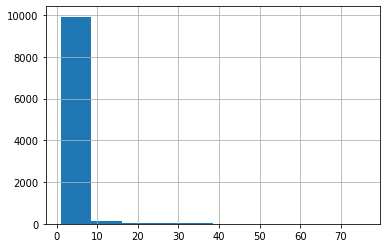

In [782]:
# hist for keyword freq
keyword_popularity['freq'].hist()

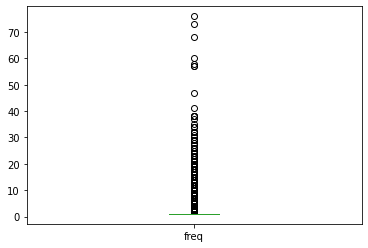

In [783]:
# box plot for keyword freq
keyword_popularity['freq'].plot.box()

In [784]:
# there are 166 keywords appeared in more than 10 papers
keyword_popularity[keyword_popularity['freq']>10]

,keyword_id,freq
0,3133,76
1,539,73
2,134,68
3,151,60
4,355,58
...,...,...
161,2068,11
162,1523,11
163,1020,11
164,324,11


Analyze the relationship between 'paper' and 'subject'

In [785]:
print(f"there are totally {len(subject)} subjects appeared in the dataset")

there are totally 4754 subjects appeared in the dataset


In [786]:
# which subject frequently appears?
paper_subject['subject_id'].value_counts()

29      1075
219     1064
973      814
1        433
723      387
        ... 
3994       1
3151       1
3119       1
1070       1
2049       1
Name: subject_id, Length: 4754, dtype: int64

In [787]:
# subject 'information technology' is the most popular one
# it appears in 1075 papers
subject[subject['id']==29].subject.tolist()[0]

'information technology'

In [788]:
# subject 'information resources management' appears in 1064 papers
subject[subject['id']==219].subject.tolist()[0]

'information resources management'

In [789]:
subject_popularity = pd.DataFrame(paper_subject['subject_id'].value_counts()).reset_index()
subject_popularity.columns = ['subject_id', 'freq']

In [790]:
# 'subject_popularity' counts the frequency for each subject
subject_popularity.head()

,subject_id,freq
0,29,1075
1,219,1064
2,973,814
3,1,433
4,723,387


In [791]:
# stat info for subject
# on average each subject is chosen by 7.36 papers
subject_popularity['freq'].describe()

count    4754.000000
mean        7.361801
std        31.849569
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max      1075.000000
Name: freq, dtype: float64

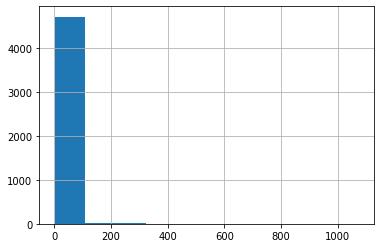

In [792]:
# hist for subject freq
subject_popularity['freq'].hist()

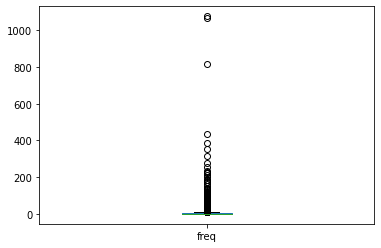

In [793]:
# box plot for subject freq
subject_popularity['freq'].plot.box()

In [794]:
# 1056 subjects appears in more than 5 papers
subject_popularity[subject_popularity['freq']>5]

,subject_id,freq
0,29,1075
1,219,1064
2,973,814
3,1,433
4,723,387
...,...,...
1051,2015,6
1052,2616,6
1053,444,6
1054,1278,6


In [795]:
# 619 subjects appears in more than 10 papers
subject_popularity[subject_popularity['freq']>10]

,subject_id,freq
0,29,1075
1,219,1064
2,973,814
3,1,433
4,723,387
...,...,...
614,1533,11
615,1597,11
616,494,11
617,1632,11
